Generating an extrapolation funtion for the electric field of the ring + rod electrodes that may be used for SPA. The data is generated in Ansys Maxwell 3D.

Import the necessary functions:

In [1]:
import numpy as np 
import pandas as pd #Use pandas to import data from 
from scipy.interpolate import interp1d #Module for making interpolation function
import pickle #Use pickle to store the interpolating function
import matplotlib.pyplot as plt #For polotting
from scipy.signal import savgol_filter
plt.style.use(['seaborn-deep', 'notebook'])

## With rods wider apart

Import data from csv file:

In [5]:
filename = "E along r = 0_rods_wider_apart_Vring_3700_Vrod_540_rod_offset_150.csv"
dataframe = pd.read_csv(filename)
# dataframe = pd.read_csv('Electric field moving along z_1.csv')
distance = (dataframe['Distance-350mm [mm]'].values)/1e3
Ez = np.abs(dataframe['Ex []'].values/1e2)
Ez_sg = savgol_filter(Ez,31,3)

Ey = dataframe['Ey []'].values/1e2
Ey_sg = savgol_filter(Ey,31,3)

Ex = dataframe['Ez []'].values/1e2
Ex_sg = savgol_filter(Ex,31,3)

#Plot the electric field as function of position as a check
fig, ax = plt.subplots()
ax.plot(distance, Ez)
ax.plot(distance, Ez_sg)

ax.plot(distance, Ex)
ax.plot(distance, Ex_sg)
ax.set_xlabel("Z-position / m")
ax.set_ylabel("Electric field magnitude / V/cm")

# Generate interpolation function and plot it
Ez_interp = interp1d(distance, Ez_sg, kind='cubic')
Ex_interp = interp1d(distance, Ex_sg, kind='cubic')
Ey_interp = interp1d(distance, Ey_sg, kind='cubic')


#Plot on the previous figure as a check
ax.plot(distance, Ez_interp(distance))
ax.plot(distance, Ex_interp(distance))
ax.plot(distance, Ey_interp(distance))

# Save interpolation functions as pickle
E_interps = [Ex_interp, Ey_interp, Ez_interp]

filename = filename[:-4] + '.pickle'
with open(filename, 'wb+') as f:
    pickle.dump(E_interps, f)

FileNotFoundError: [Errno 2] No such file or directory: 'E along r = 0_rods_wider_apart_Vring_3700_Vrod_540_rod_offset_150.csv'

## Loop for multiple files

In [3]:
filenames = [
    'E_along_r=0_SPBv6_Var_0_Vring_4000_V_rod_0_rod_offset_700.csv',
    'E_along_y=+10mm_SPBv6_Var_0_Vring_4000_V_rod_0_rod_offset_700.csv',
    'E_along_y=+15mm_SPBv6_Var_0_Vring_4000_V_rod_0_rod_offset_700.csv',
    'E_along_y=-15mm_SPBv6_Var_0_Vring_4000_V_rod_0_rod_offset_700.csv',
    'E_along_y=-10mm_SPBv6_Var_0_Vring_4000_V_rod_0_rod_offset_700.csv',
    'E_along_y=+20mm_SPBv6_Var_0_Vring_4000_V_rod_0_rod_offset_700.csv',
    'E_along_y=-20mm_SPBv6_Var_0_Vring_4000_V_rod_0_rod_offset_700.csv',
    'E_along_x=-10mm_SPBv6_Var_0_Vring_4000_V_rod_0_rod_offset_700.csv',
    'E_along_x=+10mm_SPBv6_Var_0_Vring_4000_V_rod_0_rod_offset_700.csv',
    # 'E_along_x=-10mm_y=-20mm_SPBv6_Var_0_Vring_2000_V_rod_0_rod_offset_400.csv',
    # 'E_along_x=-10mm_y=20mm_SPBv6_Var_0_Vring_2000_V_rod_0_rod_offset_400.csv',
    # 'E_along_x=10mm_y=20mm_SPBv6_Var_0_Vring_2000_V_rod_0_rod_offset_400.csv',
    # 'E_along_x=10mm_y=-20mm_SPBv6_Var_0_Vring_2000_V_rod_0_rod_offset_400.csv',
]

In [4]:
for filename in filenames:
    dataframe = pd.read_csv(filename)
    distance = (dataframe['Distance-350mm [mm]'].values)/1e3
    Ez = dataframe['Ex []'].values/1e2
    Ez_sg = savgol_filter(Ez,31,3)

    Ey = dataframe['Ey []'].values/1e2
    Ey_sg = savgol_filter(Ey,31,3)

    Ex = dataframe['Ez []'].values/1e2
    Ex_sg = savgol_filter(Ex,31,3)

    # Generate interpolation function and plot it
    Ez_interp = interp1d(distance, Ez_sg, kind='cubic')
    Ex_interp = interp1d(distance, Ex_sg, kind='cubic')
    Ey_interp = interp1d(distance, Ey_sg, kind='cubic')
    
    # Save interpolation functions as pickle
    E_interps = [Ex_interp, Ey_interp, Ez_interp]
    
    save_fname = filename[:-4] + '.pickle'
    with open(save_fname, 'wb+') as f:
        pickle.dump(E_interps, f)

In [23]:
dataframe

,Distance [mm],Distance-350mm [mm],Mag_E [V_per_meter],Distance-350mm [mm].1,Ez [],Distance-350mm [mm].2,Ex [],Distance-350mm [mm].3,Ey []
0,0.000000,-350.000000,1856.128556,-350.000000,442.873937,-350.000000,1860.851334,-350.000000,48.928052
1,0.500004,-349.499996,1876.032421,-349.499996,449.210998,-349.499996,1879.426809,-349.499996,49.363145
2,1.000008,-348.999992,1896.029947,-348.999992,455.548059,-348.999992,1898.002285,-348.999992,49.798238
3,1.500012,-348.499988,1916.121328,-348.499988,461.885120,-348.499988,1916.577760,-348.499988,50.233332
4,2.000016,-347.999984,1936.306761,-347.999984,468.222181,-347.999984,1935.153236,-347.999984,50.668425
...,...,...,...,...,...,...,...,...,...
996,498.003984,148.003984,12393.150908,148.003984,884.390143,148.003984,12356.753626,148.003984,312.329832
997,498.503988,148.503988,12436.576072,148.503988,874.992065,148.503988,12401.327389,148.503988,311.857829
998,499.003992,149.003992,12479.539204,149.003992,864.563493,149.003992,12445.832740,149.003992,312.255775
999,499.503996,149.503996,12521.952668,149.503996,853.310630,149.503996,12490.106776,149.503996,313.170564


In [24]:
distance

array([-0.35      , -0.3495    , -0.34899999, ...,  0.14900399,
        0.149504  ,  0.150004  ])

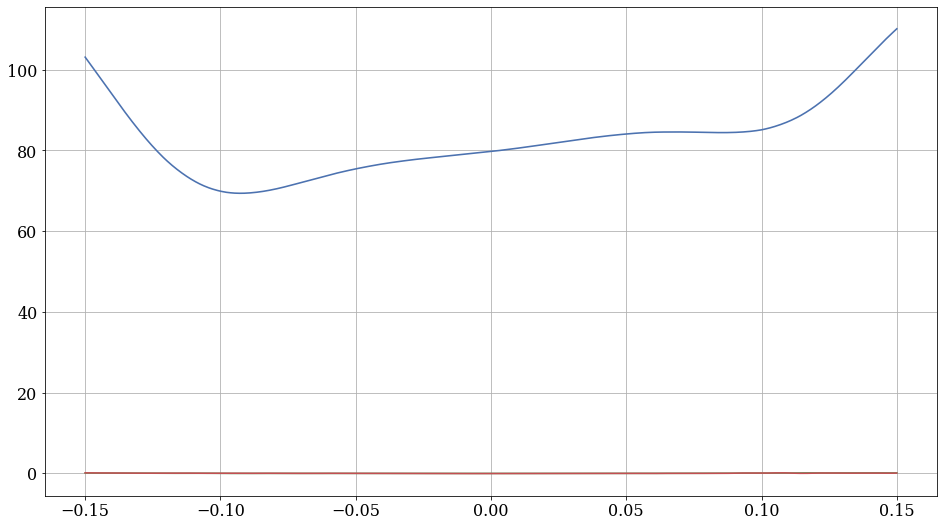

In [12]:
#Plot the electric field as function of position as a check
zs = np.linspace(-0.15,0.15,1000)

fig, ax = plt.subplots()

#Plot on the previous figure as a check
ax.plot(zs, Ez_interp(zs))
ax.plot(zs, Ex_interp(zs))
ax.plot(zs, Ey_interp(zs))